In [155]:
import tweepy
import requests as r
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from twitter_keys import Access_Token, Access_Token_Secret, Consumer_Key, Consumer_API_Secret

In [156]:
auth = tweepy.OAuthHandler(Consumer_Key, Consumer_API_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [164]:
last_tweet = api.search('@enveraai', count = 1, result_type = 'recent')

last_tweet_text = last_tweet['statuses'][0]['text']
last_tweet_id = last_tweet['statuses'][0]['id']
last_tweet_screen_name = last_tweet['statuses'][0]['user']['screen_name']

twitter_search_name = re.findall(r"(@[a-z0-9\S]+)", last_tweet_text)
print('Tweet is: ', last_tweet_text)
print('Username is: ', twitter_search_name[1])

Tweet is:  @enveraai analyze @JetBlue
Username is:  @JetBlue


In [158]:
startTime = time.clock()
tweet_text = []
for x in range(50):
    public_tweets = api.user_timeline(twitter_search_name[1], page = x)
    
    for tweet in public_tweets:
        tweet_text.append(tweet['text'])
    
    print('Running page ' + str(x) + ' of 50.')
endTime = time.clock()
print('The search took ' + str((endTime - startTime) * 1000) + ' milliseconds')

Running page 0 of 50.
Running page 1 of 50.
Running page 2 of 50.
Running page 3 of 50.
Running page 4 of 50.
Running page 5 of 50.
Running page 6 of 50.
Running page 7 of 50.
Running page 8 of 50.
Running page 9 of 50.
Running page 10 of 50.
Running page 11 of 50.
Running page 12 of 50.
Running page 13 of 50.
Running page 14 of 50.
Running page 15 of 50.
Running page 16 of 50.
Running page 17 of 50.
Running page 18 of 50.
Running page 19 of 50.
Running page 20 of 50.
Running page 21 of 50.
Running page 22 of 50.
Running page 23 of 50.
Running page 24 of 50.
Running page 25 of 50.
Running page 26 of 50.
Running page 27 of 50.
Running page 28 of 50.
Running page 29 of 50.
Running page 30 of 50.
Running page 31 of 50.
Running page 32 of 50.
Running page 33 of 50.
Running page 34 of 50.
Running page 35 of 50.
Running page 36 of 50.
Running page 37 of 50.
Running page 38 of 50.
Running page 39 of 50.
Running page 40 of 50.
Running page 41 of 50.
Running page 42 of 50.
Running page 43 of 50

In [159]:
startTime = time.clock()

compound_score = []
analyzer = SentimentIntensityAnalyzer()
for text_ in tweet_text:
    score = analyzer.polarity_scores(text_)['compound']
    compound_score.append(score)

endTime = time.clock()
print('Finished the sentiment analysis. I took ' + str((endTime - startTime) * 1000) + ' milliseconds to complete the task.')

Finished the sentiment analysis. I took 356.40300000000025 milliseconds to complete the task.


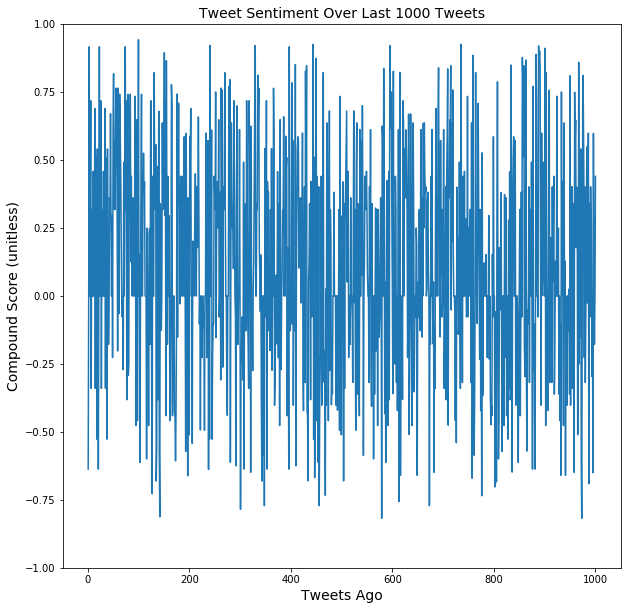

In [161]:
plt.figure(figsize = (10, 10))
plt.plot(np.arange(1, len(compound_score) + 1), compound_score)
plt.xlabel('Tweets Ago', fontsize = 14)
plt.ylabel('Compound Score (unitless)', fontsize = 14)
plt.title('Tweet Sentiment Over Last 1000 Tweets', fontsize = 14)
plt.ylim(-1, 1, 0.25)
plt.show()